In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
%load_ext autoreload
%autoreload 2

In [2]:
%run proj1_helpers.py
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

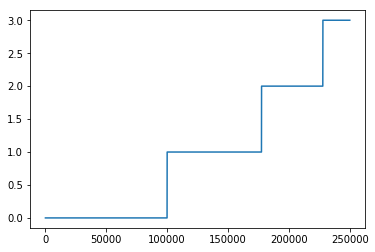

In [3]:
# categorical column

plt.plot(np.sort(tX[:,22]))
tx = tX

In [4]:
# split data into 4 different catagories

Indices0 = tx[:,22]==0
x0 = tx[np.where(tx[:,22]==0)]

Indices1 = tx[:,22]==1
x1 = tx[np.where(tx[:,22]==1)]

Indices2 = tx[:,22]==2
x2 = tx[np.where(tx[:,22]==2)]

Indices3 = tx[:,22]==3
x3 = tx[np.where(tx[:,22]==3)]

In [5]:
# set the -999 to the median of the column

x = x0
x = np.where(x==-999, np.nan, x)
col_median = np.nanmedian(x, axis=0)
inds_nan = np.where(np.isnan(x))
x[inds_nan] = np.take(col_median, inds_nan[1])
x0 = x

x = x1
x = np.where(x==-999, np.nan, x)
col_median = np.nanmedian(x, axis=0)
inds_nan = np.where(np.isnan(x))
x[inds_nan] = np.take(col_median, inds_nan[1])
x1 = x

x = x2
x = np.where(x==-999, np.nan, x)
col_median = np.nanmedian(x, axis=0)
inds_nan = np.where(np.isnan(x))
x[inds_nan] = np.take(col_median, inds_nan[1])
x2 = x

x = x3
x = np.where(x==-999, np.nan, x)
col_median = np.nanmedian(x, axis=0)
inds_nan = np.where(np.isnan(x))
x[inds_nan] = np.take(col_median, inds_nan[1])
x3 = x

D:\programs\lib\site-packages\numpy\lib\nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [6]:
# remove the nan collumns

x0 = x0[:,~np.all(np.isnan(x0), axis=0)]
x1 = x1[:,~np.all(np.isnan(x1), axis=0)]
x2 = x2[:,~np.all(np.isnan(x2), axis=0)]
x3 = x3[:,~np.all(np.isnan(x3), axis=0)]

In [7]:
print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)

(99913, 20)
(77544, 23)
(50379, 30)
(22164, 30)


In [8]:
# normalize the datasets

x = x0
minmax = dataset_minmax(x)
x_normalized = np.copy(x)
normalize_dataset(x_normalized, minmax)
x0 = x_normalized

x = x1
minmax = dataset_minmax(x)
x_normalized = np.copy(x)
normalize_dataset(x_normalized, minmax)
x1 = x_normalized

x = x2
minmax = dataset_minmax(x)
x_normalized = np.copy(x)
normalize_dataset(x_normalized, minmax)
x2 = x_normalized

x = x3
minmax = dataset_minmax(x)
x_normalized = np.copy(x)
normalize_dataset(x_normalized, minmax)
x3 = x_normalized

In [9]:
# split the labels
y0 = y[Indices0==1]
y1 = y[Indices1==1]
y2 = y[Indices2==1]
y3 = y[Indices3==1]

In [10]:
x0 = x0[:,:-2]

In [11]:
def least_square(y, tx):

    Gram = np.dot(np.transpose(tx), tx)

    ws = np.dot(np.linalg.inv(Gram), np.dot(np.transpose(tx), y))

    loss = compute_loss(y, tx, ws)

    return loss, ws

In [14]:
weights_LS = least_square(y0, x0)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS,y0,x0)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

y_pred0 = predict_labels(weights_LS, x0)

Categorical accuracy train :  0.816940738442445  || f1_score train:  0.20832063122029948


In [15]:
weights_LS = least_square(y1, x1)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS,y1,x1)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

y_pred1 = predict_labels(weights_LS, x1)

Categorical accuracy train :  0.710886722376973  || f1_score train:  0.28063990421392226


In [16]:
weights_LS = least_square(y2, x2)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS,y2,x2)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

y_pred2 = predict_labels(weights_LS, x2)

Categorical accuracy train :  0.7343337501736835  || f1_score train:  0.5466687821835019


In [17]:
weights_LS = least_square(y3, x3)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS,y3,x3)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

y_pred3 = predict_labels(weights_LS, x3)

Categorical accuracy train :  0.723154665222884  || f1_score train:  0.12121725862507417


In [37]:
#TO DO: Add y_pred0,1,2,3 up into one array with the correct indices
# apply this to the test data to make a submission
# use better algorithm than simple Least Squares